# Árvore de decisão

### Base de dados: Forma de Trabalho Ideal

Ilustra o funcionamento do algoritmo de árvore de decisão com dados nominais.

Este notebook foi desenvolvido para o ambiente GOOGLE COLAB ([colab.research.google.com](https://colab.research.google.com)).

Prof. Hugo de Paula e Hayala

Feito Por: João Vitor de Lima

-------------------------------------------------------------------------------






In [1]:
!pip install pandas scikit-learn matplotlib pydotplus dtreeviz

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Transformação de dados

Inicialmente os atributos são convertidos para o formato de dicionário.
Em seguida os atributos são transformados em binário, para cada par (key, value) do dicionário.

<code>DictVectorizer(dtype=class ‘numpy.float64’, separator=’=’, sparse=True, sort=True)</code>

A classe é convertida para labels únicos sequenciais.

<code>
 le = preprocessing.LabelEncoder()
  
 le.fit(dados)
</code>


In [2]:
df = pd.read_csv("data_tratada.csv")

print("\nDimensões:", df.shape)
print("\nCampos:", df.columns)
print(df.describe())

# Remover registros com alvo ausente
df = df.dropna(subset=['Forma de trabalho ideal'])

# Separar variáveis independentes e alvo
X_dict = df.drop(columns=['Forma de trabalho ideal', 'Cargo atual']).to_dict(orient='records')
vect = DictVectorizer(sparse=False)
X = vect.fit_transform(X_dict)

le = LabelEncoder()
y = le.fit_transform(df['Forma de trabalho ideal'])

# Dividir os dados corretamente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape dos dados de treino:", X_train.shape)
print("Shape dos dados de teste:", X_test.shape)


Dimensões: (4754, 21)

Campos: Index(['Idade', 'Genero', 'Cor/Raca', 'Trabalho domestico', 'PCD',
       'Estado onde mora', 'Região onde mora', 'Roubos de veículo',
       'Roubos de carro', 'Roubos de moto', 'Roubos de bicicleta',
       'Roubos fora do domicilio', 'Nivel de ensino', 'Area de formação',
       'Situação atual de trabalho', 'Cargo atual', 'Nivel', 'Faixa salarial',
       'Tempo de experiencia', 'Forma de trabalho atual',
       'Forma de trabalho ideal'],
      dtype='object')
             Idade  Trabalho domestico  Roubos de veículo  Roubos de carro  \
count  4753.000000         4753.000000        4753.000000      4753.000000   
mean     31.880497           16.777383          69.823901        46.861772   
std       7.271435            0.389795          34.506653        26.568697   
min      18.000000           16.500000          12.000000         8.000000   
25%      27.000000           16.500000          12.000000        10.000000   
50%      30.000000           1

### Indução do Modelo


Os três passos para indução de um modelo são:

1.   Instanciar o modelo: ``` DecisionTreeClassifier()```
2.   Treinar o modelo: ```fit()```
3.   Testar o modelo: ```predict()```



In [3]:
# Definir modelo com limitação de profundidade e folhas mínimas
treeForma = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=5, min_samples_leaf=4)
treeForma.fit(X_train, y_train)

# Avaliação no conjunto de teste
y_pred = treeForma.predict(X_test)
print("Acurácia no teste:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(cnf_matrix, index=[f"Real={c}" for c in le.classes_], columns=[f"Prev={c}" for c in le.classes_])
print(cnf_table)


Acurácia no teste: 0.652875175315568
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.68      0.76      0.72       617
           2       0.23      0.05      0.08       110
           3       0.64      0.68      0.66       669

    accuracy                           0.65      1426
   macro avg       0.39      0.37      0.36      1426
weighted avg       0.61      0.65      0.63      1426

                                                    Prev=Modelo 100% presencial  \
Real=Modelo 100% presencial                                                   0   
Real=Modelo 100% remoto                                                       0   
Real=Modelo híbrido com dias fixos de trabalho ...                            0   
Real=Modelo híbrido flexível (o funcionário tem...                            0   

                                                    Prev=Modelo 100% remoto  \
Real=Modelo 100% presencial      

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Exibição da árvore de decisão




Importância dos atributos:
Forma de trabalho atual=Modelo 100% remoto                                                                                                0.646890
Forma de trabalho atual=Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente)    0.148385
Idade                                                                                                                                     0.050389
Nivel=Não informado                                                                                                                       0.018115
Forma de trabalho atual=Modelo 100% presencial                                                                                            0.013509
Situação atual de trabalho=Empregado (CLT)                                                                                                0.011894
Genero=Masculino                                                                          

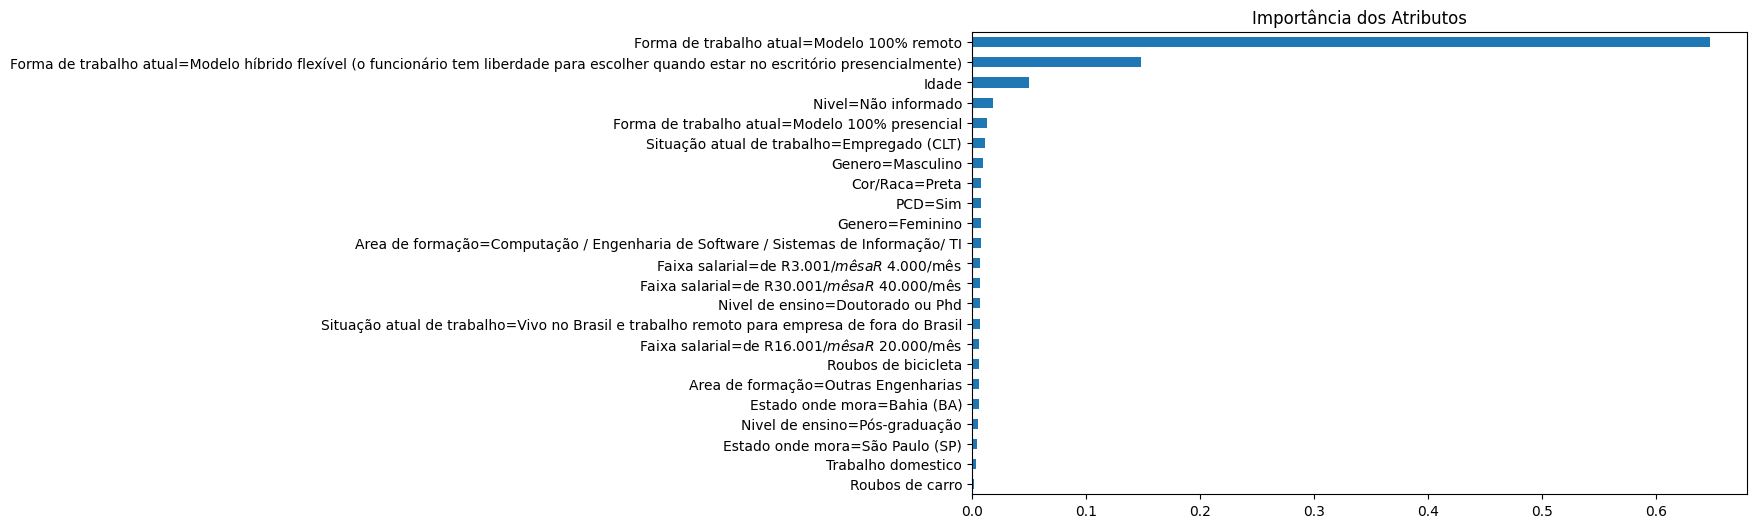

In [4]:
# Exibir importâncias dos atributos
importances = pd.Series(treeForma.feature_importances_, index=vect.feature_names_)
importances = importances[importances > 0].sort_values(ascending=False)
print("\nImportância dos atributos:")
print(importances)

# Visualizar graficamente
importances.plot(kind='barh', figsize=(10, 6), title='Importância dos Atributos')
plt.gca().invert_yaxis()
plt.show()


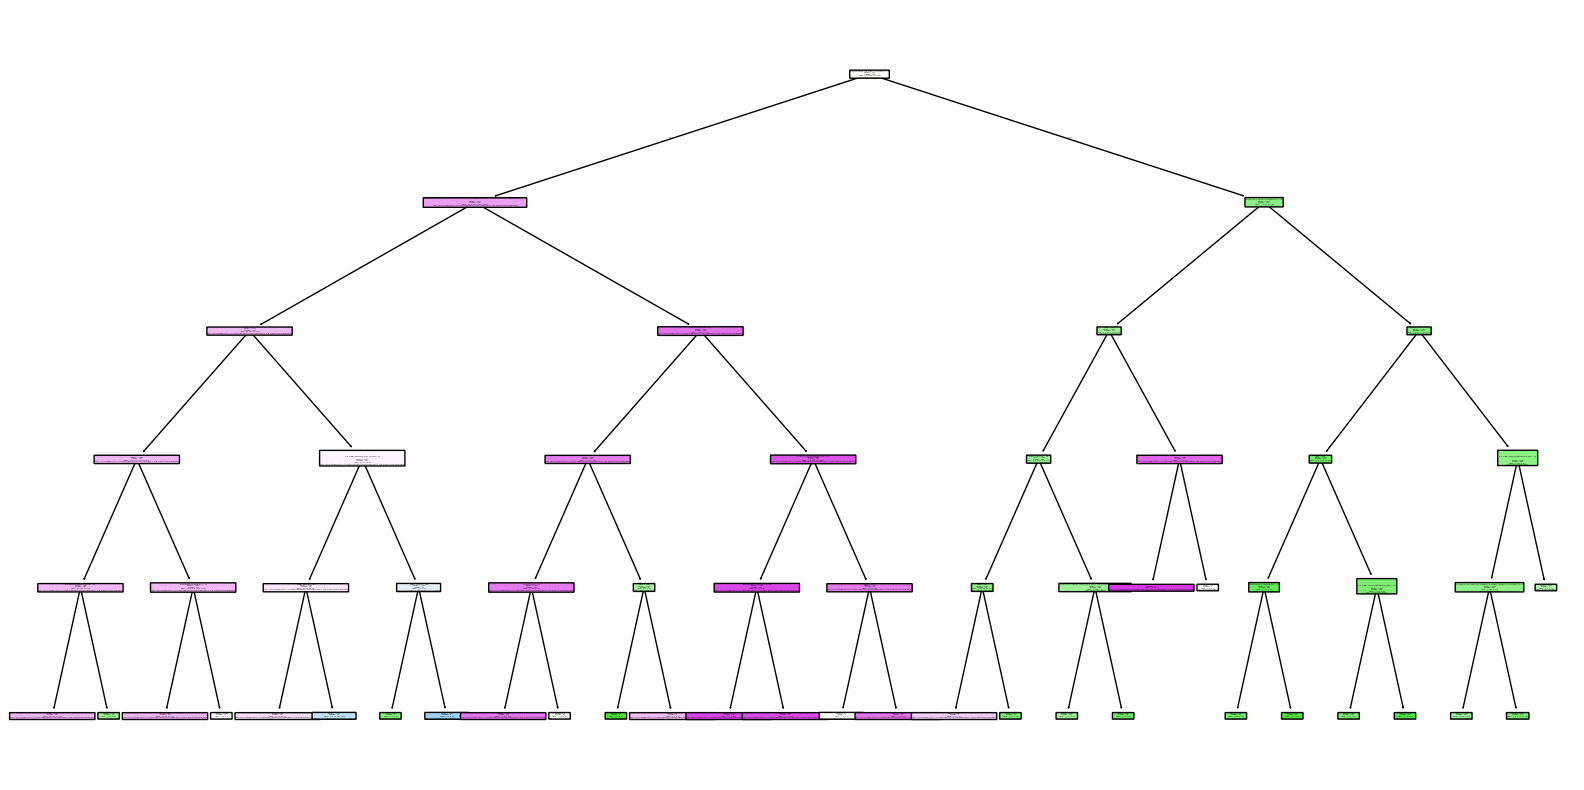

In [7]:
# Visualizar a árvore com profundidade limitada
from sklearn import tree

plt.figure(figsize=(20, 10))
tree.plot_tree(treeForma,
               feature_names=vect.get_feature_names_out(),  # alternativo mais robusto
               class_names=[str(c) for c in le.classes_],    # garantir strings
               filled=True,
               rounded=True)
plt.show()
